In [26]:
from typing import TypedDict,List
from langgraph.graph import StateGraph, START,END
import random


class AgentState(TypedDict):
    random: int
    selectedNumber: int
    minNo:int
    maxNo:int
    guess:int


def setSelectedNumber(state:AgentState)->AgentState:
    state["minNo"]=0
    state["maxNo"]=10
    print("The selected number is "+str(state["selectedNumber"]))
    return state

def guessNumber(state:AgentState)->AgentState:
    state["guess"]=random.randint(state["minNo"],state["maxNo"])
    print("The guess is: "+str(state["guess"]))

    if state["guess"]>state["selectedNumber"]:
        state["maxNo"]=state["guess"]-1

    elif state["guess"]<state["selectedNumber"]:
        state["minNo"]=state["guess"]+1

    print("The Min is: "+str(state["minNo"]))
    print("The MAx is: "+str(state["maxNo"]))
    return state

def choose_nextAction(state:AgentState)->AgentState:
    if state["guess"]==state["selectedNumber"]:
        return "END"
    else:
        return "guess"
    

graph=StateGraph(AgentState)
graph.add_node("setSelectedNumber",setSelectedNumber)
graph.add_node("guess",guessNumber)
graph.add_node("router",lambda state:state)
graph.add_edge(START,"setSelectedNumber")
graph.add_edge("setSelectedNumber","guess")
graph.add_edge("guess","router")
graph.add_conditional_edges(
    "router",
    choose_nextAction,
    {
        "guess":"guess",
        "END":END
    }
    )



app=graph.compile()

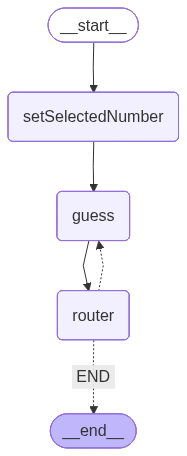

In [21]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))

In [29]:
initial_State=AgentState(selectedNumber=5)
print(app.invoke(initial_State))

The selected number is 5
The guess is: 1
The Min is: 2
The MAx is: 10
The guess is: 2
The Min is: 3
The MAx is: 10
The guess is: 4
The Min is: 5
The MAx is: 10
The guess is: 6
The Min is: 5
The MAx is: 5
The guess is: 5
The Min is: 5
The MAx is: 5
{'selectedNumber': 5, 'minNo': 5, 'maxNo': 5, 'guess': 5}
